In [75]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = sns.load_dataset('iris')

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [14]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
df = df[df['species'] != 'setosa'] # removing setosa

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [25]:
df['species'] = df['species'].map({'versicolor' : 1  , 'virginica' : 0})

In [26]:
df['species']

50     1
51     1
52     1
53     1
54     1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 100, dtype: int64

In [31]:
# split my dataset 
X = df.drop(columns = 'species')
y = df['species']

In [34]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [35]:
y.head()

50    1
51    1
52    1
53    1
54    1
Name: species, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [41]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
141,6.9,3.1,5.1,2.3
107,7.3,2.9,6.3,1.8
78,6.0,2.9,4.5,1.5
139,6.9,3.1,5.4,2.1
102,7.1,3.0,5.9,2.1


In [42]:
logreg = LogisticRegression(penalty = 'l2')

In [43]:
logreg.fit(X_train , y_train)

LogisticRegression()

In [46]:
y_pred = logreg.predict(X_test)

In [49]:
accuracy_score(y_pred , y_test)

0.9

# 90 % accuracy

In [52]:
logreg.coef_

array([[ 0.08330397,  0.56587774, -2.76132767, -2.04974292]])

In [53]:
logreg.intercept_

array([14.52614524])

# now optimising it further using grid search cv 

In [61]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters = ({'penalty' : ['l1','l2','elastic'] , 'max_iter':[10,100,200,300,400,500] , 'C':[1,2,3,4,5,6,10,20,40,50,80,60] })

In [66]:
classifier_regressor = GridSearchCV(logreg , param_grid = parameters , scoring = 'accuracy' , cv = 10)

In [68]:
classifier_regressor.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 40, 50, 80, 60],
                         'max_iter': [10, 100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elastic']},
             scoring='accuracy')

In [69]:
classifier_regressor.best_params_

{'C': 3, 'max_iter': 10, 'penalty': 'l2'}

In [70]:
classifier_regressor.best_score_

0.975

In [72]:
y_pred = classifier_regressor.predict(X_test)

In [73]:
y_pred


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [74]:
accuracy_score(y_pred , y_test)

0.95

# 95% accuracy

In [78]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.93      1.00      0.96        13

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



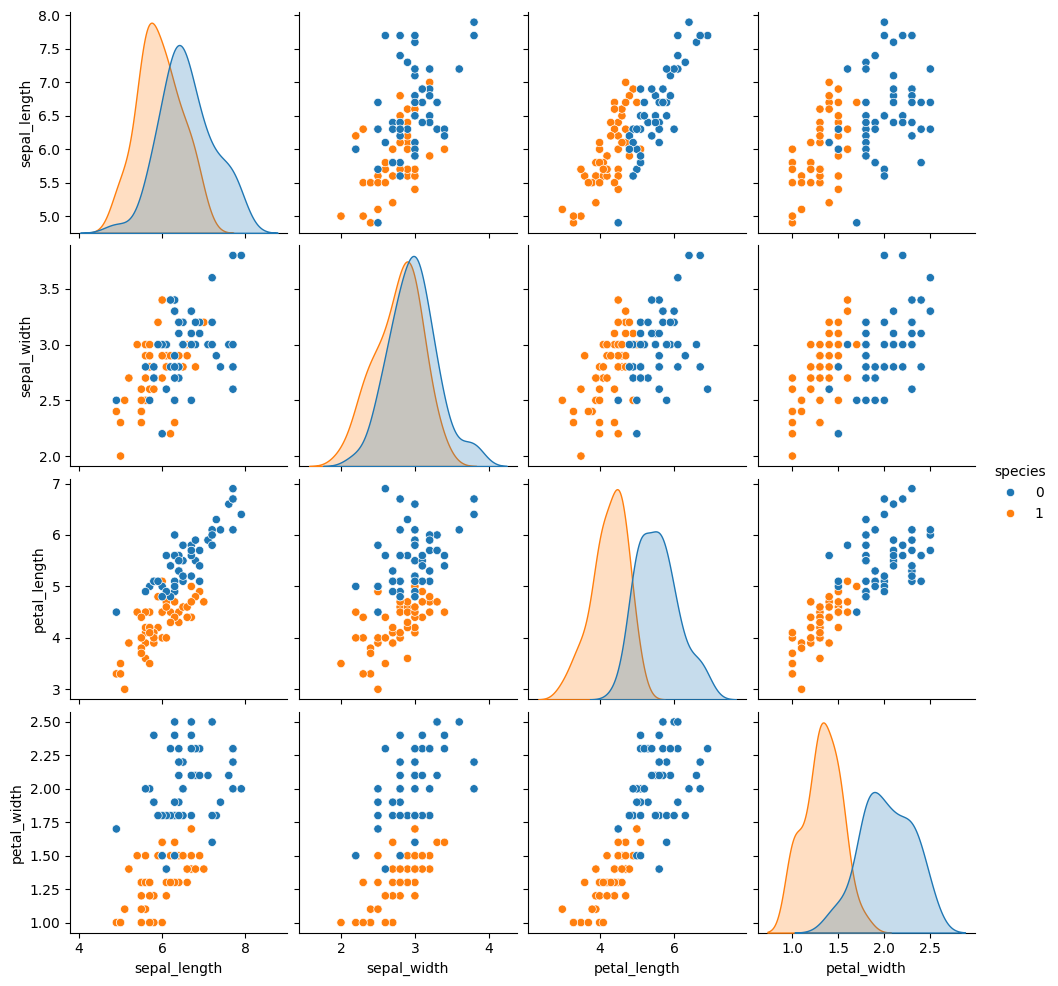

In [79]:
sns.pairplot(df , hue = 'species')

In [80]:
correlation = df.corr()

In [81]:
correlation

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,-0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,-0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,-0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,-0.828129
species,-0.494305,-0.308080,-0.786424,-0.828129,1.000000


<Axes: >

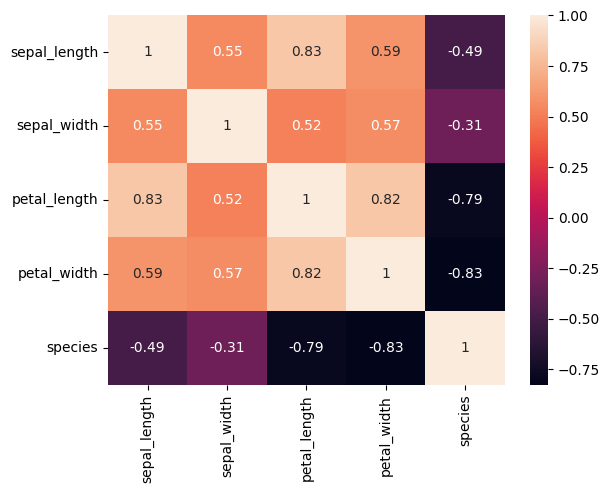

In [83]:
sns.heatmap(correlation , annot = True)

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
scores = cross_val_score(logreg, X_train, y_train, cv=5)

In [86]:
scores

array([0.9375, 1.    , 0.875 , 0.9375, 1.    ])